In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [133]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.shape)
customer_df.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [134]:
customer_df.columns = customer_df.columns.str.lower().str.replace(' ','_')

In [135]:
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [136]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [137]:
customer_df.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [138]:
numerical_df = customer_df.select_dtypes(np.number)
numerical_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [139]:
numerical_df['monthly_premium_auto'].value_counts(dropna=False)

65     348
66     307
71     304
73     302
63     289
      ... 
273      1
287      1
268      1
232      1
286      1
Name: monthly_premium_auto, Length: 202, dtype: int64

In [140]:
# def numerica(dataframe):
#     columnas = dataframe.columns
#     discrete_df = []
#     continuous_df = []

#     for columna in columnas:
#         if dataframe[columna].dtype == 'int64' or dataframe[columna].dtype == 'float64':
#             if len(dataframe[columna].unique()) < 20:
#                 discrete_df.append(columna)
#             else:
#                 continuous_df.append(columna)
#     discretas_df = dataframe[discrete_df]
#     continuas_df = dataframe[continuous_df]

#     return pd.DataFrame(discrete_df), pd.DataFrame(continuous_df)

In [141]:
# discrete_df, continuous_df = numerica(numerical_df)

In [142]:
continuous_df=numerical_df.drop(['months_since_policy_inception','months_since_last_claim','number_of_open_complaints','number_of_policies'],axis=1)
discrete_df= numerical_df.drop(['monthly_premium_auto','customer_lifetime_value','income','total_claim_amount'],axis=1)
# Columnas que seleccionaria manualmente

In [143]:
continuous_df

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274,69,384.811147
1,6979.535903,0,94,1131.464935
2,12887.431650,48767,108,566.472247
3,7645.861827,0,106,529.881344
4,2813.692575,43836,73,138.130879
...,...,...,...,...
9129,23405.987980,71941,73,198.234764
9130,3096.511217,21604,79,379.200000
9131,8163.890428,0,85,790.784983
9132,7524.442436,21941,96,691.200000


In [144]:
discrete_df

,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,32,5,0,1
1,13,42,0,8
2,18,38,0,2
3,18,65,0,7
4,12,44,0,1
...,...,...,...,...
9129,18,89,0,2
9130,14,28,0,1
9131,9,37,3,2
9132,34,3,0,3


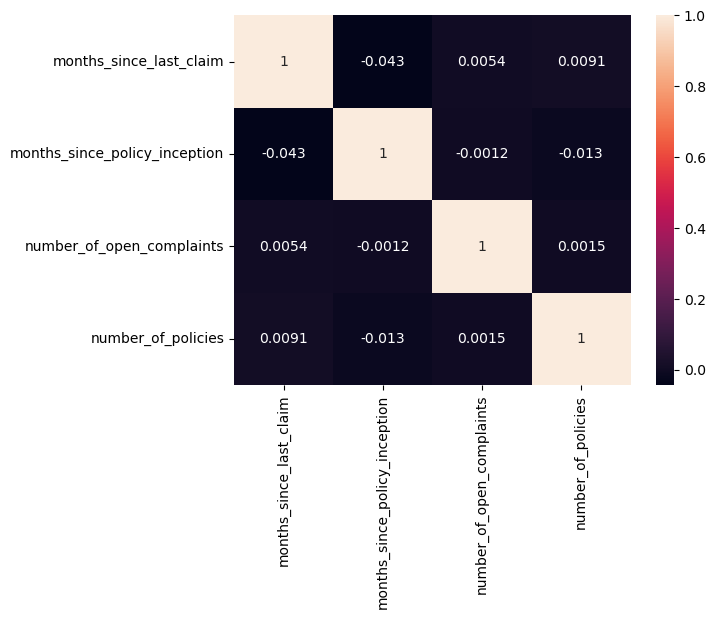

In [145]:
correlations_matrix = discrete_df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

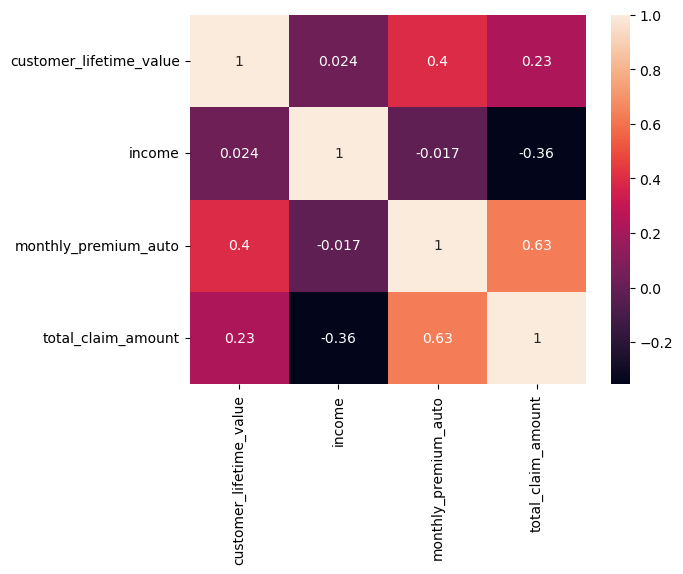

In [146]:
correlations_matrix = continuous_df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [147]:
#I can see that the is no correlations between the columns, the max correlations is between monthly premium auto and customer lifetime value but is not high.

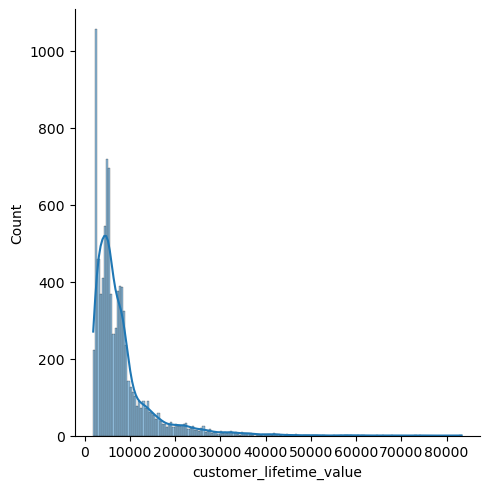

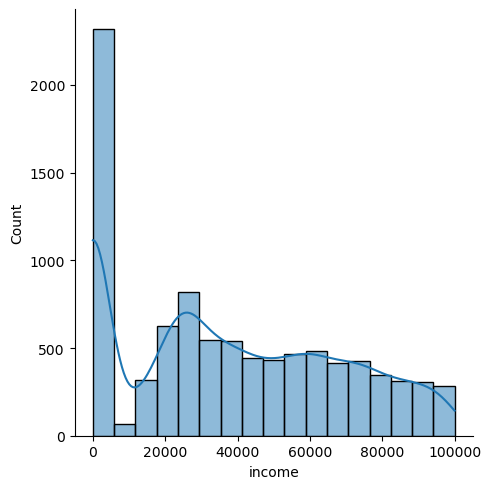

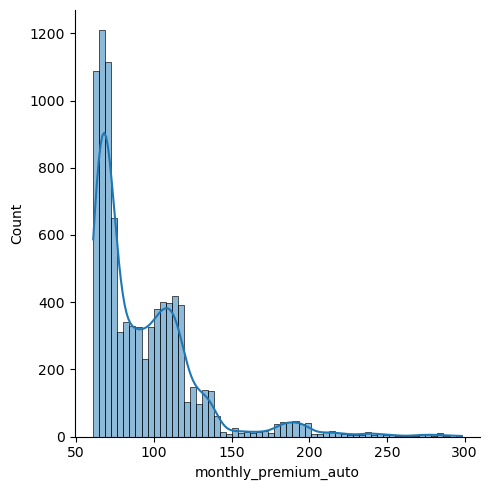

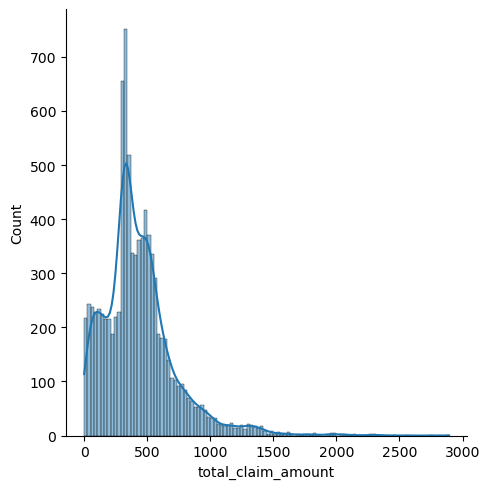

In [148]:
for column in continuous_df.columns:
    sns.displot(continuous_df[column],kde=True)
    plt.show()

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

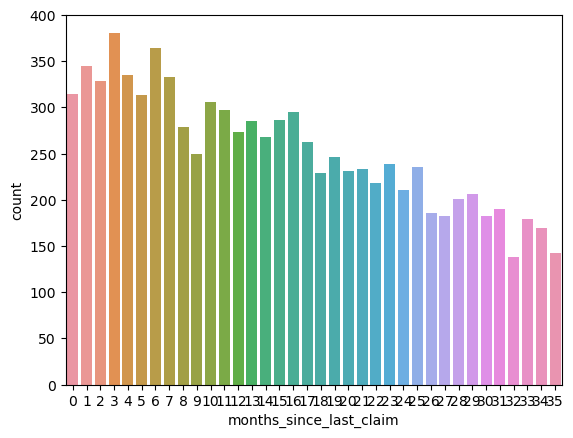

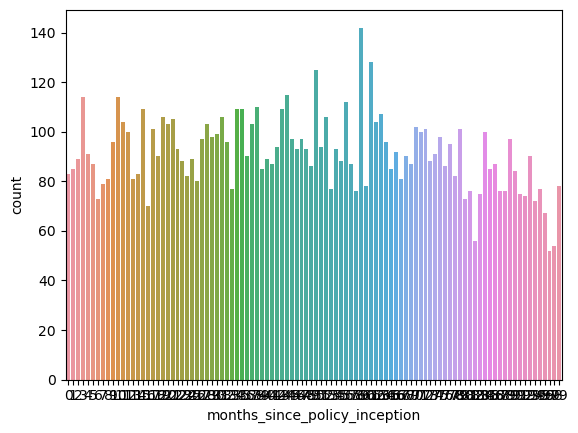

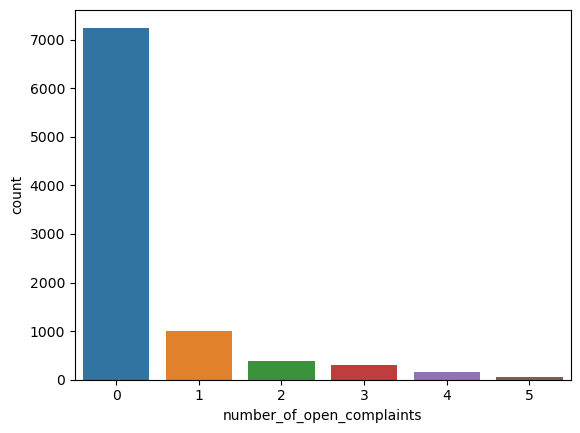

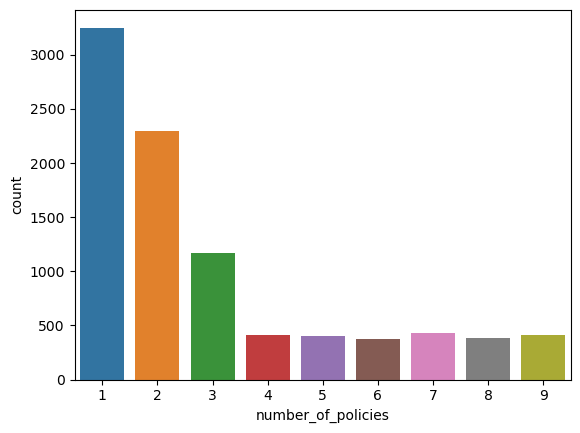

In [150]:
for column in discrete_df.columns:
    sns.countplot(data=discrete_df, x=column)
    plt.show()

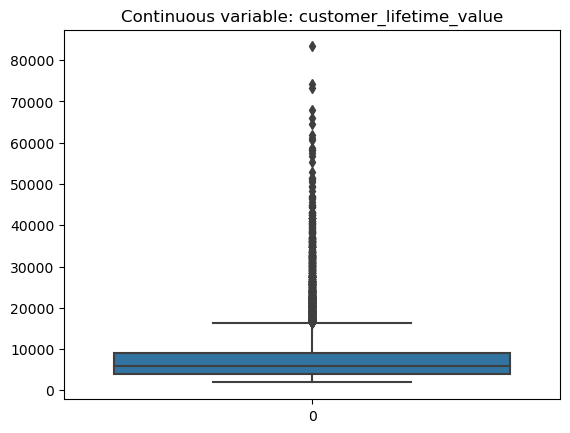

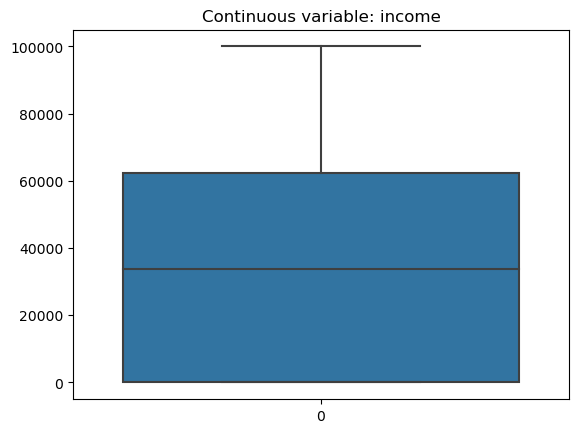

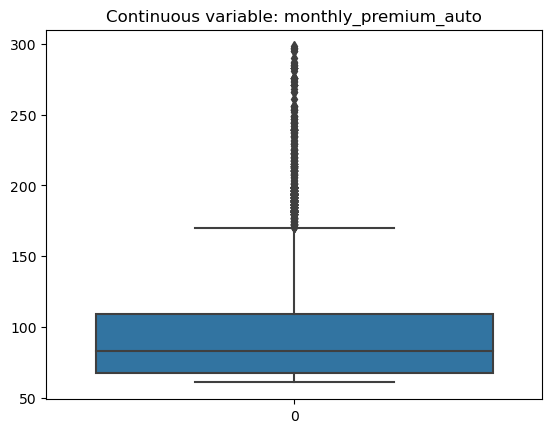

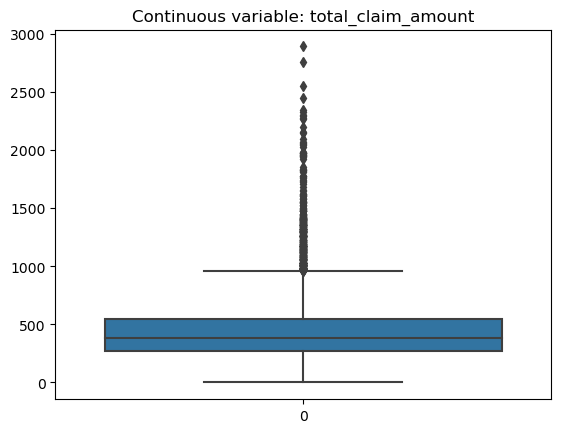

In [151]:
for column in continuous_df.columns:
    sns.boxplot(data=continuous_df[column])
    plt.title(f'Continuous variable: {column}')
    plt.show()


In [152]:
def count_outliers_iqr(dataframe, column_name):
    # Calculate the IQR
    q1 = np.nanpercentile(dataframe[column_name], 25)
    q3 = np.nanpercentile(dataframe[column_name], 75)
    iqr = q3 - q1
    # Calculate the upper Limit for potential outliers 
    upper_limit = q3 + 1.5 * iqr
    # Identify potential outliers
    potential_outliers = dataframe[dataframe[column_name] > upper_limit]
    #Count the number of potential outliers 
    num_outliers = len(potential_outliers)
    return num_outliers, upper_limit

In [153]:
out_lifetime_value = count_outliers_iqr(continuous_df, 'customer_lifetime_value')
out_lifetime_value

(817, 16414.039911750002)

In [154]:
out_total_claim_amount = count_outliers_iqr(continuous_df, 'total_claim_amount')
out_total_claim_amount

(453, 960.3997301249999)

In [155]:
out_monthly_premium_auto = count_outliers_iqr(continuous_df, 'monthly_premium_auto')
out_monthly_premium_auto

(430, 170.5)

In [156]:
#Podemos notar en el grafico boxplot que en customer lifetime value, total claim amount y monthly premium auto tenemos valores que se encuentran fuera de nuestro rango, pero al mismo tiempo cuando vemos la cantidad de valores que tenemos por fuera de nuestro rango son muchos por lo que no deberiamos quitarlos. De todas formas total claim amount sabemos que es nuestro target por lo que no deberiamos modificar sus valores.

In [157]:
#Tambien podemos notar que en el caso de customer lifetime tenemos algunos valores que se encuentran solos por separado por lo que podemos analizar quitarlos

In [158]:
outliers = numerical_df ['customer_lifetime_value'].nlargest(4)
outliers

5716    83325.38119
1974    74228.51604
6252    73225.95652
7283    67907.27050
Name: customer_lifetime_value, dtype: float64

In [159]:
outliers = numerical_df ['customer_lifetime_value'].nlargest(4).index
outliers

Int64Index([5716, 1974, 6252, 7283], dtype='int64')

In [160]:
numerical_df = numerical_df.drop(outliers)

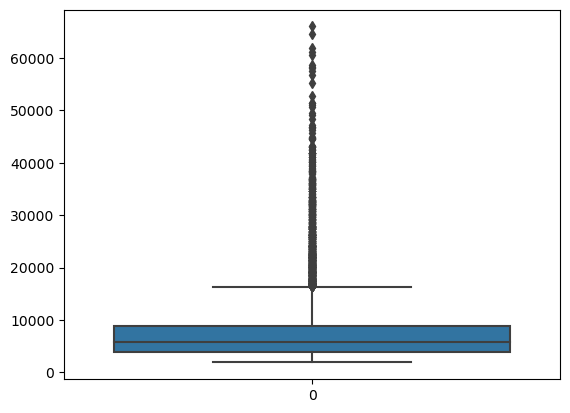

In [161]:
sns.boxplot(data=numerical_df ['customer_lifetime_value'])
plt.show()

In [162]:
numerical_df.reset_index(drop=True, inplace=True)

In [163]:
numerical_df.isnull().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

In [164]:
numerical_df.to_csv('numerical.csv', index=False)

In [165]:
#lab afternoon

In [166]:
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [167]:
categorical_df = customer_df.select_dtypes(object)
categorical_df.head(10)

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
5,OC83172,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize
6,XZ87318,Oregon,Yes,Basic,College,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
7,CF85061,Arizona,No,Premium,Master,Unemployed,M,Urban,Single,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
8,DY87989,Oregon,Yes,Basic,Bachelor,Medical Leave,M,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
9,BQ94931,Oregon,No,Extended,College,Employed,F,Urban,Married,Special Auto,Special L2,Offer2,Branch,Four-Door Car,Medsize


In [168]:
categorical_df.isnull().sum()

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

In [171]:
# for columna in categorical_df.columns:
#     unique_values = categorical_df[columna].unique()
#     print(f"Valores únicos de la columna {columna}: {unique_values}")

In [170]:
for columna in categorical_df.columns:
    unique_counts = categorical_df[columna].value_counts()
    print(f"Valores únicos y su cuenta en la columna {columna}:\n{unique_counts}")

Valores únicos y su cuenta en la columna customer:
BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: customer, Length: 9134, dtype: int64
Valores únicos y su cuenta en la columna state:
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
Valores únicos y su cuenta en la columna response:
No     7826
Yes    1308
Name: response, dtype: int64
Valores únicos y su cuenta en la columna coverage:
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
Valores únicos y su cuenta en la columna education:
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
Valores únicos y su cuenta en la columna employmentstatus:
Employed         5698
Unemployed       2317
Medical Leave     432
Disable